# Trabalho de Classificação
**Dataset Titanic**



**Disciplina: MATE56 - Tópicos B**

**Docente: Ricardo Rocha**

**Discente: Jeff Caponero**

# Definindo o banco de dados

# Objetivo

Este trabalho tem por objetivo a análise e processamento dos dados dos passageiros de maneira a criar três modelos de predição de sobreviventes do desastre.

# Acessando os dados de treino e teste

Os dados disponibilizados pelo docente Prof. Ricardo Rocha foram armazenados na github por conveniência de acesso.

In [ ]:
url1 = 'https://raw.githubusercontent.com/Dr-Caponero/Titanic/main/topicosB-treino.txt'
url2 = 'https://raw.githubusercontent.com/Dr-Caponero/Titanic/main/topicosB-teste.txt'

In [ ]:
treino = read.csv(url1)
teste = read.csv(url2)

As análise serão feitas sobre um dataset criado a partir dos dados dos passageiros do Titanic que participaram de sua viagem inaugural que resultou em naufágio, evidenciando aqueles que sobreviveram ao desatre. O dataset está dividido em dois: no primeiro, chamado de treino, consta a informação sobre a sobrevivencia ou não do passageiro; no segundo, chamado de teste, essa informação é suprimida.

# Análise do dataset

In [ ]:
# Visualização dos dados de treino e das catedorias das variáveis

head(treino)
head(teste)

,name,sex,age,sibsp,parch,ticket,fare,embarked,pclass,survived
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<int>,<int>
1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,1
2,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,1
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,1,0
4,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S,1,1
5,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S,1,1
6,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,S,1,1


,name,sex,age,sibsp,parch,ticket,fare,embarked,pclass
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<int>
1,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,S,1
2,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,S,1
3,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0.0000,S,1
4,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,C,1
5,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30.0000,S,1
6,"Beckwith, Mr. Richard Leonard",male,37,1,1,11751,52.5542,S,1


In [ ]:
# Estatística básica dos dados

summary(treino)
summary(teste)

     name               sex                 age              sibsp      
 Length:1000        Length:1000        Min.   : 0.3333   Min.   :0.000  
 Class :character   Class :character   1st Qu.:21.0000   1st Qu.:0.000  
 Mode  :character   Mode  :character   Median :28.0000   Median :0.000  
                                       Mean   :29.6804   Mean   :0.484  
                                       3rd Qu.:38.0000   3rd Qu.:1.000  
                                       Max.   :70.5000   Max.   :8.000  
                                       NA's   :210                      
     parch          ticket               fare           embarked        
 Min.   :0.000   Length:1000        Min.   :  0.000   Length:1000       
 1st Qu.:0.000   Class :character   1st Qu.:  7.896   Class :character  
 Median :0.000   Mode  :character   Median : 14.454   Mode  :character  
 Mean   :0.384                      Mean   : 33.788                     
 3rd Qu.:0.000                      3rd Qu.: 31.275

     name               sex                 age              sibsp       
 Length:309         Length:309         Min.   : 0.1667   Min.   :0.0000  
 Class :character   Class :character   1st Qu.:21.0000   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :30.0000   Median :0.0000  
                                       Mean   :30.6381   Mean   :0.5469  
                                       3rd Qu.:39.0000   3rd Qu.:1.0000  
                                       Max.   :80.0000   Max.   :8.0000  
     parch           ticket               fare           embarked        
 Min.   :0.0000   Length:309         Min.   :  0.000   Length:309        
 1st Qu.:0.0000   Class :character   1st Qu.:  7.896   Class :character  
 Median :0.0000   Mode  :character   Median : 14.454   Mode  :character  
 Mean   :0.3883                      Mean   : 31.702                     
 3rd Qu.:0.0000                      3rd Qu.: 30.500                     
 Max.   :6.0000                      M

Destacam-se

*   A variável idade e tarifa têm informações faltantes
*   A sobrevivência foi de 39,2%
*   Cabe melhor análise da distribuição da tarifa e da idade



In [ ]:
# Determinando o número de registros únicos
length(treino$name)
length(unique(treino$name))

length(unique(treino$ticket))


[1] 1000

[1] 999

[1] 755

In [ ]:
treino$name[duplicated(treino$name)]

[1] "Kelly, Mr. James"

In [ ]:
treino$age[treino$name == "Kelly, Mr. James"]

[1] 34.5 44.0

Existem dois Mr. Kelly (homônimos). Não há outros homônimos. Os dados de ticket apresentam informações duplicadas 

In [ ]:
# Determinando a sobrevivência por sexo

aggregate(treino$survived ~ treino$sex, FUN = mean, na.rm = TRUE)
table(treino$sex)

treino$sex,treino$survived
<chr>,<dbl>
female,0.7372881
male,0.2027864



female   male 
   354    646 

As mulheres tiveram maior taxa de sobrevivência

In [ ]:
# Determinando a sobrevivência por classe da acomodação

aggregate(treino$survived ~ treino$pclass, FUN = mean, na.rm = TRUE)
table(treino$pclass)

treino$pclass,treino$survived
<int>,<dbl>
1,0.6309524
2,0.4380952
3,0.2620818



  1   2   3 
252 210 538 

Observa-se uma estratificação social na taxa de sobrevivência

In [ ]:
# Determinando a sobrevivência por parentesco horizontal

aggregate(treino$survived ~ treino$sibsp, FUN = mean, na.rm = TRUE)
table(treino$sibsp)

treino$sibsp,treino$survived
<int>,<dbl>
0,0.3584906
1,0.5211864
2,0.4687500
3,0.3125000
4,0.1176471
5,0.0000000
8,0.0000000



  0   1   2   3   4   5   8 
689 236  32  16  17   4   6 

Aqueles com apenas um parente horizontal tiveram maior taxa de sobrevivência. Provavelmente casais.

In [ ]:
# Determinando a sobrevivência por parentesco vertical

aggregate(treino$survived ~ treino$parch, FUN = mean, na.rm = TRUE)
table(treino$parch)

treino$parch,treino$survived
<int>,<dbl>
0,0.3455020
1,0.6015038
2,0.5189873
3,0.6250000
4,0.2000000
5,0.0000000
6,0.0000000
9,0.0000000



  0   1   2   3   4   5   6   9 
767 133  79   8   5   5   1   2 

Aqueles com 1 a 3 parentes verticais tiveram maior taxa de sobrevivência. Provavelmente casais com filhos.

In [ ]:
# Determinando a sobrevivência por local de embarque

aggregate(treino$survived ~ treino$embarked, FUN = mean, na.rm = TRUE)
table(treino$embarked)

treino$embarked,treino$survived
<chr>,<dbl>
,1.0000000
C,0.5799087
Q,0.3333333
S,0.3381924



      C   Q   S 
  2 219  93 686 

Os embarcadados em Cherbourg tiveram maior taxa de sobrevivência.

OBS. DOIS EMBARCADOS NÃO TEM LOCAL DEFINIDO!!!

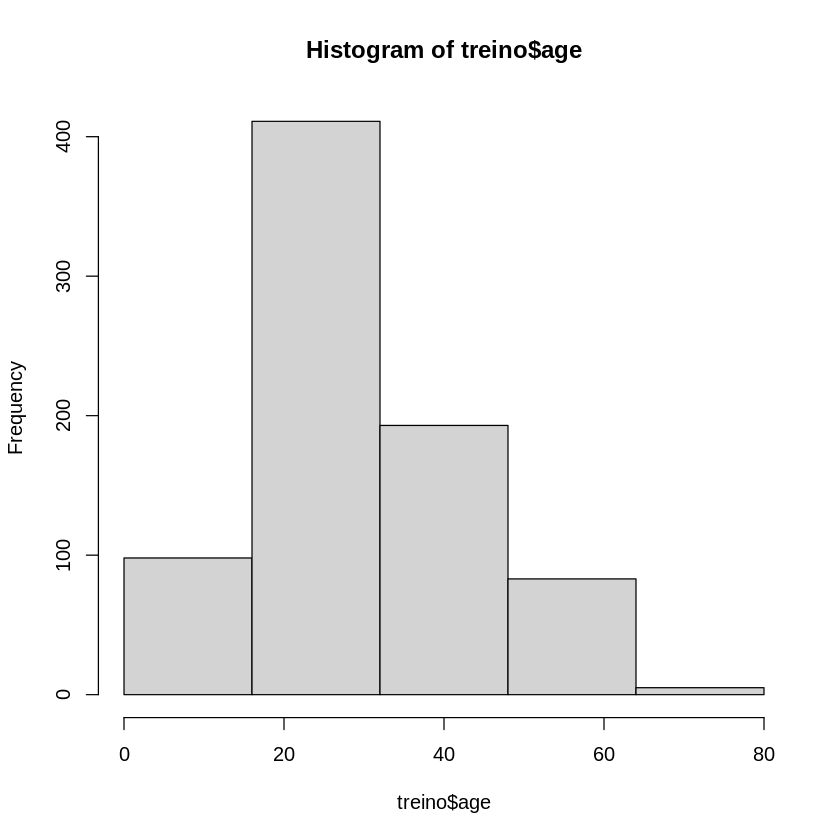

In [ ]:
# Distribuição de Idades

hist(treino$age, breaks = c(0, 16, 32, 48, 64, 80))

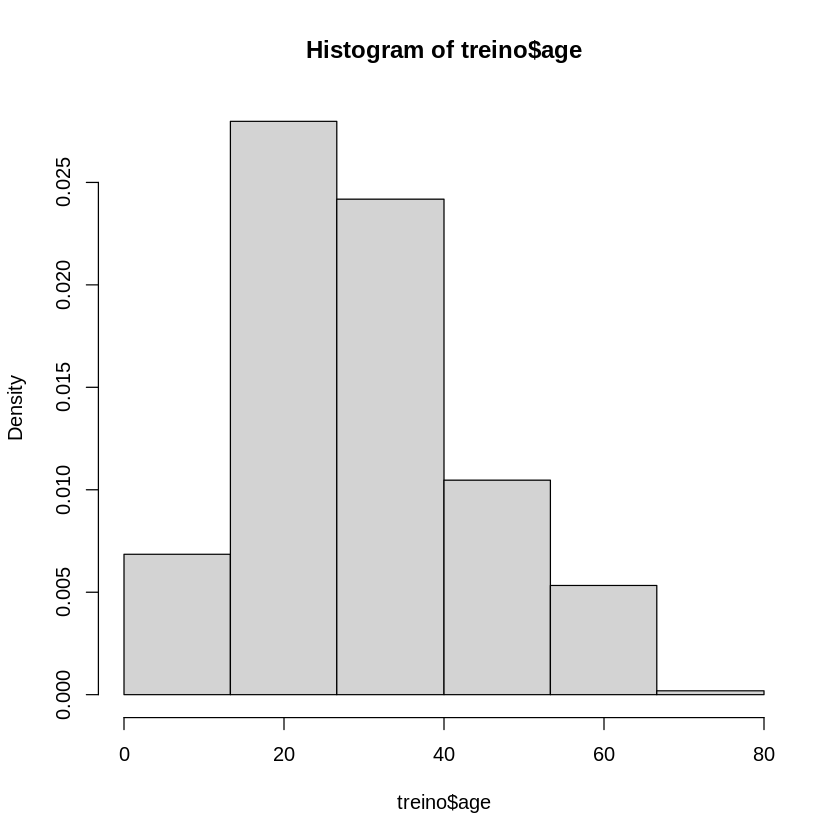

In [ ]:
hist(treino$age, breaks = c(0, 13.3, 26.6, 40, 53.3, 66.6, 80))

In [ ]:
# Determinando a sobrevivência por faixa de idade

aggregate(treino$survived ~ cut(treino$age, c(0, 16, 32, 48, 64, 80)), 
          FUN = mean, na.rm = TRUE)
table(cut(treino$age, c(0, 16, 32, 48, 64, 80)))

"cut(treino$age, c(0, 16, 32, 48, 64, 80))",treino$survived
<fct>,<dbl>
"(0,16]",0.5714286
"(16,32]",0.3844282
"(32,48]",0.4041451
"(48,64]",0.4457831
"(64,80]",0.0000000



 (0,16] (16,32] (32,48] (48,64] (64,80] 
     98     411     193      83       5 

In [ ]:
aggregate(treino$survived ~ cut(treino$age, 
          c(0, 13.3, 26.6, 40, 53.3, 66.6, 80)), 
          FUN = mean, na.rm = TRUE)
table(cut(treino$age, c(0, 13.3, 26.6, 40, 53.3, 66.6, 80)))

"cut(treino$age, c(0, 13.3, 26.6, 40, 53.3, 66.6, 80))",treino$survived
<fct>,<dbl>
"(0,13.3]",0.5555556
"(13.3,26.6]",0.3979592
"(26.6,40]",0.4023438
"(40,53.3]",0.4272727
"(53.3,66.6]",0.3928571
"(66.6,80]",0.0000000



   (0,13.3] (13.3,26.6]   (26.6,40]   (40,53.3] (53.3,66.6]   (66.6,80] 
         72         294         256         110          56           2 

As crianças tiveram maior taxa de sobrevivência.

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
“the AREAS in the plot are wrong -- rather use 'freq = FALSE'”


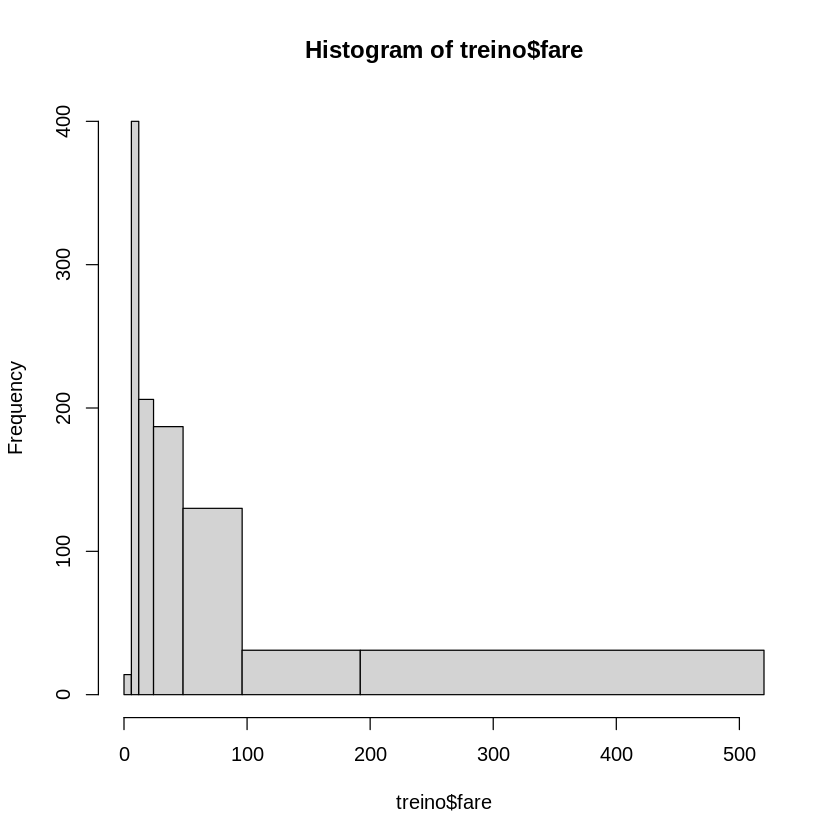

In [ ]:
# Distribuição de Tarifas

hist(treino$fare, breaks = c(0, 6, 12, 24, 48, 96, 192, 520), freq = TRUE)

In [ ]:
aggregate(treino$survived ~ cut(treino$fare, 
          c(0, 6, 12, 24, 48, 96, 192, 520)), 
          FUN = mean, na.rm = TRUE)
    table(cut(treino$fare, c(0, 6, 12, 24, 48, 96, 192, 520)))    

"cut(treino$fare, c(0, 6, 12, 24, 48, 96, 192, 520))",treino$survived
<fct>,<dbl>
"(0,6]",0.3333333
"(6,12]",0.2450000
"(12,24]",0.4223301
"(24,48]",0.4064171
"(48,96]",0.6307692
"(96,192]",0.7741935
"(192,520]",0.7096774



    (0,6]    (6,12]   (12,24]   (24,48]   (48,96]  (96,192] (192,520] 
        3       400       206       187       130        31        31 

In [ ]:
aggregate(treino$survived ~ cut(treino$fare, 
          c(0, 6, 12, 48, 96, 520)), 
          FUN = mean, na.rm = TRUE)
table(cut(treino$fare, c(0, 6, 12, 48, 96, 520)))    

"cut(treino$fare, c(0, 6, 12, 48, 96, 520))",treino$survived
<fct>,<dbl>
"(0,6]",0.3333333
"(6,12]",0.2450000
"(12,48]",0.4147583
"(48,96]",0.6307692
"(96,520]",0.7419355



   (0,6]   (6,12]  (12,48]  (48,96] (96,520] 
       3      400      393      130       62 

Os que mais gastaram tiveram maior taxa de sobrevivência.


Conclusão:

Parece ter vigorado a premissa de de que crianças e mulheres tinham prioridade no uso de recursos de sobrevivência. Menos evidente, mas ainda observável é a estratificação socio-econômica, que privilegiou os mais abastados no uso destes recursos.

# Pré-Processamento comum aos modelos

## Determinando os títulos honoríficos

In [ ]:
# Evidenciando os títulos honoríficos do conjunto de dados de treino

titulo = function(x){
          aux = strsplit(strsplit(x, ', ')[[1]][2], '. ')[[1]][1]
          return(aux)
}

tit = sapply(treino$name, titulo)
table(tit)

tit
   Col    Don     Dr   Lady  Major Master   Miss   Mlle    Mme     Mr    Mrs 
     4      1      6      1      1     48    197      2      1    580    151 
    Ms    Rev    Sir     th 
     1      5      1      1 

In [ ]:
treino$name = tit

In [ ]:
# Evidenciando os títulos honoríficos do conjunto de dados de teste

tit2 = sapply(teste$name, titulo)
table(tit2)

tit2
    Capt     Dona       Dr Jonkheer    Major   Master     Miss       Mr 
       1        1        2        1        1       13       63      177 
     Mrs       Ms      Rev 
      46        1        3 

In [ ]:
teste$name = tit2

In [ ]:
# Verificando se há dados faltantes de "Capt", "Dona" e "Jonkheer".

teste[teste$name == 'Capt',]
teste[teste$name == 'Dona',]
teste[teste$name == 'Jonkheer',]

,name,sex,age,sibsp,parch,ticket,fare,embarked,pclass
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<int>
17,Capt,male,70,1,1,WE/P 5735,71,S,1


,name,sex,age,sibsp,parch,ticket,fare,embarked,pclass
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<int>
50,Dona,female,39,0,0,PC 17758,108.9,C,1


,name,sex,age,sibsp,parch,ticket,fare,embarked,pclass
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<int>
54,Jonkheer,male,38,0,0,19972,0,S,1


## Tratando dados faltantes

In [ ]:
anyNA(treino)

[1] TRUE

In [ ]:
anyNA(teste)

[1] FALSE

In [ ]:
colSums(is.na(treino))


name      sex      age    sibsp    parch   ticket     fare embarked 
       0        0      210        0        0        0        1        0 
  pclass survived 
       0        0

Completando com a idade média dos passageiros de mesmo título


In [ ]:
# Determinando a mediana da idade de cada título, uma vez que os títulos tem  
# certa ligação com a idade. Ex. Miss e Master são usados para solteiros, 
# Dr e Rev para pessoas graduadas etc.

idades = aggregate(treino$age ~ treino$name, FUN = median, na.rm = TRUE)
idades

treino$name,treino$age
<chr>,<dbl>
Col,54.50
Don,40.00
Dr,44.00
Lady,48.00
Major,45.00
Master,4.00
Miss,22.00
Mlle,24.00
Mme,24.00


In [ ]:
# Completando as idades nos dados de treino
i = 0
for (i in 1:1000){
  if (is.na(treino$age[i])) { 
    treino$age[i] = idades$'treino$age'[idades$'treino$name' == treino$name[i]]
  }
}

guardatreinoage = treino$age
guardatesteage = teste$age

##############################################
# Não há idades faltando nos dados de teste
##############################################

Completando o local de embarque, local modal dos passageiros de mesmo classe

In [ ]:
treino[treino$embarked == "",]

,name,sex,age,sibsp,parch,ticket,fare,embarked,pclass,survived
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<int>,<int>
134,Miss,female,38,0,0,113572,80,,1,1
223,Mrs,female,62,0,0,113572,80,,1,1


In [ ]:
# Instalando o pacote ggplot2 (gráfico)
install.packages('ggplot2')
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



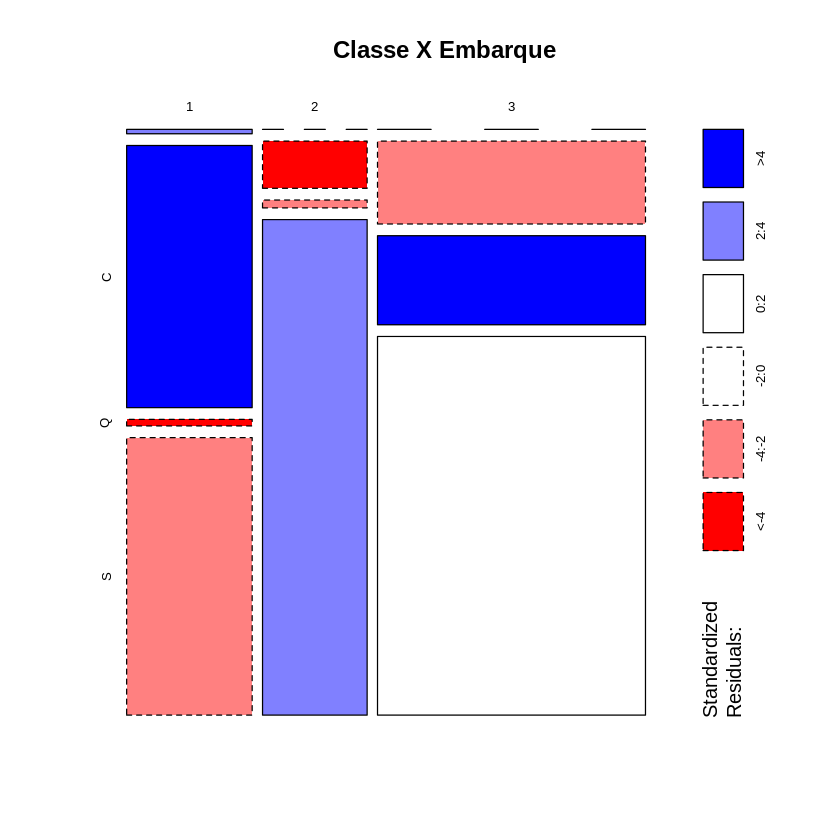

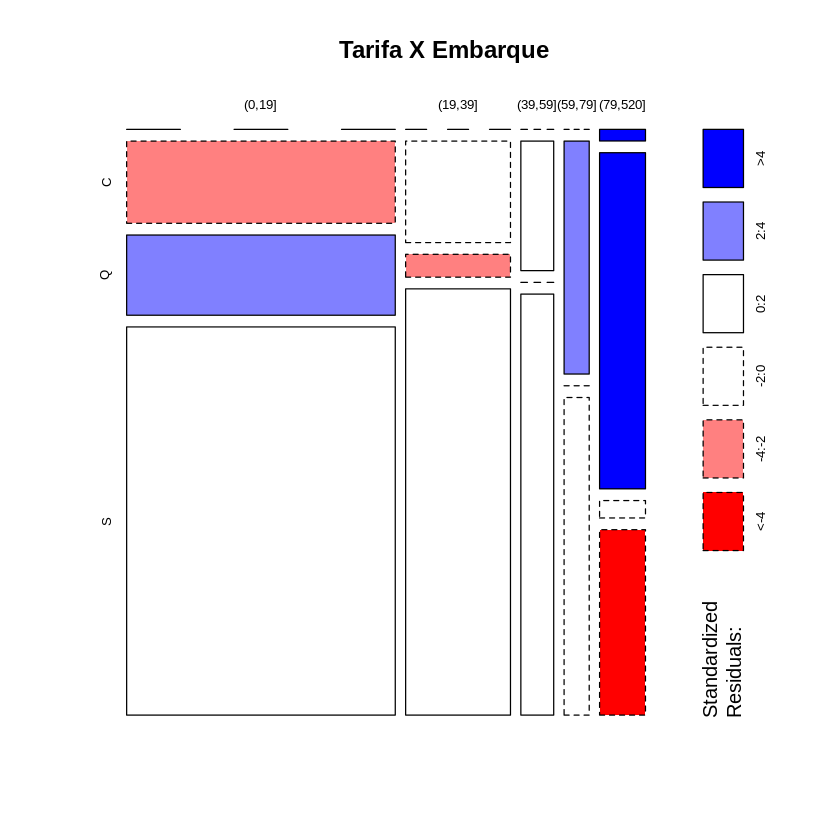

In [ ]:
# Avaliando a correlação entre a o local de embarque e a classe e a tarifa
mosaicplot(table(treino$pclass, treino$embarked), 
main='Classe X Embarque', shade=TRUE)
mosaicplot(table(cut(treino$fare, c(0, 19, 39, 59, 79, 520)), treino$embarked), 
main='Tarifa X Embarque', shade=TRUE)

Observa-se que as altas tarifas (>79) e a primeira classe teve embarque prioritário em Cherbourg

In [ ]:
# Completando os locais de embarque faltantes nos dados de treino
treino$embarked[treino$embarked == ""] = 'C'

#########################################################
# Não há locais de embarque faltando nos dados de teste
#########################################################

In [ ]:
# Determinando a tarifa média de cada classe
classes = aggregate(treino$fare ~ treino$pclass, FUN = mean, na.rm = TRUE)
classes

treino$pclass,treino$fare
<int>,<dbl>
1,88.37188
2,20.67498
3,13.30179


In [ ]:
# Completando as tarifas nos dados de treino
k = 0
for (k in 1:1000){
  if (is.na(treino$fare[k])){
    treino$fare[k] = classes$'treino$fare'[classes$'treino$pclass' == treino$pclass[k]]
  }
  }


guardatreinofare = treino$fare
guardatestefare = teste$fare

#########################################################
# Não há tarifas faltando nos dados de teste
#########################################################

In [ ]:
anyNA(treino$fare)

[1] FALSE

In [ ]:
colSums(is.na(treino))

name      sex      age    sibsp    parch   ticket     fare embarked 
       0        0        0        0        0        0        0        0 
  pclass survived 
       0        0

## Dummificando as variáveis categóricas

In [ ]:
# Dummificando a variável sexo
# male = 1, female = 0

# conjunto treino
treino$sex = ifelse(treino$sex == 'male', 1, 0)

# conjunto teste
teste$sex = ifelse(teste$sex == 'male', 1, 0)

In [ ]:
# Dummificando a variável embarque
# Para S, EmbS = 1 e EmbC = 0
# Para C, EmbS = 0 e EmbC = 1
# Para Q, EmbS = 0 e EmbC = 0

# conjunto treino
treino$EmbS = ifelse(treino$embarked == 'S', 1, 0)
treino$EmbC = ifelse(treino$embarked == 'C', 1, 0)

# conjunto teste 
teste$EmbS = ifelse(teste$embarked == 'S', 1, 0)
teste$EmbC = ifelse(teste$embarked == 'C', 1, 0)

# eliminando dados não processados 
treino = treino[, -8]
teste = teste[, -8]

In [ ]:
# Dummificando a variável classe
# Para 1, Class1 = 1 e Class2 = 0
# Para 2, Class1 = 0 e Class2 = 1
# Para 3, Class1 = 0 e Class2 = 0

# conjunto treino 
treino$Class1 = ifelse(treino$pclass == 1, 1, 0)
treino$Class2 = ifelse(treino$pclass == 2, 1, 0)

# conjunto teste
teste$Class1 = ifelse(teste$pclass == 1, 1, 0)
teste$Class2 = ifelse(teste$pclass == 2, 1, 0)

# eliminando dados não processados
treino = treino[, -8]
teste = teste[, -8]

In [ ]:
# Dummificando a variável nome
# Para Master, Tit = 0, Tit2 = 0 e Sex = 1
# Para Miss, Tit = 0, Tit2 = 0 e Sex = 0
# Para Mr, Tit = 1, Tit2 = 0 e Sex = 1
# Para Mrs, Tit = 1, Tit2 = 0 e Sex = 0
# demais títulos Tit = 0 e Tit2 = 1

# Conjunto treino
for (i in 1:1000){
if(treino$name[i] == 'Master' | treino$name[i] == 'Miss') {
        treino$Tit[i] <- 0
        treino$Tit2[i] <- 0
} else  {
        if(treino$name[i] == 'Mr' | treino$name[i] == 'Master'){
                treino$Tit[i] <- 1
                treino$Tit2[i] <- 0
         } else {
                treino$Tit[i] <- 0
                treino$Tit2[i] <- 1       
        }
}
}

# Conjunto teste
for (k in 1:309){
if(teste$name[k] == 'Master' | teste$name[k] == 'Miss') {
        teste$Tit[k] <- 0
        teste$Tit2[k] <- 0
} else  {
        if(teste$name[k] == 'Mr' | teste$name[k] == 'Master'){
                teste$Tit[k] <- 1
                teste$Tit2[k] <- 0
         } else {
                teste$Tit[k] <- 0
                teste$Tit2[k] <- 1       
        }
}
}


# eliminando dados não processados
treino = treino[, -1]
teste = teste[, -1]

## Classificando as variáveis contínuas

In [ ]:
# Classificando a varável idade
# <= 16 anos, Idade1 = 1
# < 16 e <= 32 anos, Idade2 = 1
# < 32 e <= 48 anos, Idade3 = 1
# < 48 e <= 64 anos, Idade4 = 1
# > 64 anos, Idade1 = Idade2 = Idade3 = Idade4 = 0

# conjunto de dados de treino
treino$idade1 = ifelse(treino$age <= 16, 1, 0)
treino$idade2 = ifelse(treino$age < 16 & treino$age <= 32, 1, 0)
treino$idade3 = ifelse(treino$age < 32 & treino$age <= 48, 1, 0)
treino$idade4 = ifelse(treino$age < 48 & treino$age <= 64, 1, 0)


# conjunto de dados de teste
teste$idade1 = ifelse(teste$age <= 16, 1, 0)
teste$idade2 = ifelse(teste$age < 16 & teste$age <= 32, 1, 0)
teste$idade3 = ifelse(teste$age < 32 & teste$age <= 48, 1, 0)
teste$idade4 = ifelse(teste$age < 48 & teste$age <= 64, 1, 0)


# eliminando dados não processados
treino = treino[, -2]
teste = teste[, -2]

In [ ]:
# Classificando a varável tarifa
# <= 6, tarifa1 = 1
# > 6 e <= 12, tarifa2 = 1
# > 12 e <= 48, tarifa3 = 1
# > 48 e <= 96, tarifa4 = 1
# > 96, tarifa1 = tarifa2 = tarifa3 = tarifa4 = 0


# conjunto de dados de treino
treino$tarifa1 = ifelse(treino$fare <= 6, 1, 0)
treino$tarifa2 = ifelse(treino$fare > 6 & treino$fare <= 12, 1, 0)
treino$tarifa3 = ifelse(treino$fare > 12 & treino$fare <= 48, 1, 0)
treino$tarifa4 = ifelse(treino$fare > 48 & treino$fare <= 96, 1, 0)

# conjunto de dados de teste
teste$tarifa1 = ifelse(teste$fare <= 6, 1, 0)
teste$tarifa2 = ifelse(teste$fare > 6 & teste$fare <= 12, 1, 0)
teste$tarifa3 = ifelse(teste$fare > 12 & teste$fare <= 48, 1, 0)
teste$tarifa4 = ifelse(teste$fare > 48 & teste$fare <= 96, 1, 0)

# eliminando dados não processados
treino = treino[, -5]
teste = teste[, -5]

## Engenharia de variáveis

Da análise realizada no dataset infere-se que haveriam 4 categorias principais de grupos entre os passageiros:
* Passageiros desacompanhados (Sozinho = 1)
* Casais (duplas) ou trios (Casal = 1, Filhos = 0)
* Casais/trios + 1 a 3 filhos (Casal = 1, Filhos = 1)
* Outros (Sozinho = 0, Casal = 0)

In [ ]:
# Processando os dados de treino
treino$sozinho = ifelse(treino$sibsp == 0 & treino$parch == 0, 1, 0)
treino$casal = ifelse(treino$sibsp == 1 | treino$sibsp == 2, 1, 0)
treino$filhos = ifelse(treino$sibsp == 1 & treino$parch > 0 & treino$parch < 4, 1, 0)

#  Processando os dados de teste
teste$sozinho = ifelse(teste$sibsp == 0 & teste$parch == 0, 1, 0)
teste$casal = ifelse(teste$sibsp == 1 | teste$sibsp == 2, 1, 0)
teste$filhos = ifelse(teste$sibsp == 1 & teste$parch > 0 & teste$parch < 4, 1, 0)

# eliminando dados não processados
treino = treino[, -c(2, 3)]
teste = teste[, -c(2, 3)]

# Pacotes de Modelagem: Instalação

In [ ]:
# instalando pacotes de modelagem
install.packages('caret')
install.packages('e1071')
install.packages('randomForest')
library(caret)
library(e1071)
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
head(treino)
head(teste)

,sex,ticket,survived,EmbS,EmbC,Class1,Class2,Tit,Tit2,idade1,idade2,idade3,idade4,tarifa1,tarifa2,tarifa3,tarifa4,sozinho,casal,filhos
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,24160,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,1,113781,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,1
3,1,113781,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1
4,1,19952,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
5,0,13502,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
6,0,11769,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


,sex,ticket,EmbS,EmbC,Class1,Class2,Tit,Tit2,idade1,idade2,idade3,idade4,tarifa1,tarifa2,tarifa3,tarifa4,sozinho,casal,filhos
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,113781,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,1
2,0,113781,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1
3,1,112050,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0
4,1,PC 17609,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0
5,1,27042,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
6,1,11751,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1


In [ ]:
attach(treino)

# Primeiro Grupo de modelos de predição

## Descarte de variáveis


A partir da análise do dataset, observou-se que algumas váriáveis não aparentam ter correlação clara com a sobrevivência dos passageiros.

In [ ]:
# Descartando a variável ticket 
tickettreino = treino$ticket
ticketteste = teste$ticket
treino = treino[,-2]
teste = teste[, -2]

In [ ]:
# defnindo o controle do treinamento

controle = trainControl(method = 'repeatedcv', number = 20, repeats = 10)


## Teste de acurácias

In [ ]:
# Ajustando o modelo como Regressão Logaritimica

metodo = 'glm' 
rl1 = train(factor(survived) ~ ., data = treino, method = metodo, 
          trControl = controle)
AcuRL1 = rl1$results$Accuracy
rl1$results  

,parameter,Accuracy,Kappa,AccuracySD,KappaSD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,none,0.7844255,0.5414879,0.05424536,0.1178655


In [ ]:
# Ajustando pelo modelo KNN

metodo = 'knn'
knn1 = train(factor(survived) ~ ., data = treino, method = metodo, 
            trControl = controle, tuneLength = 40 )

knn1

k-Nearest Neighbors 

1000 samples
  18 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 951, 950, 950, 949, 950, 950, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7693383  0.5041238
   7  0.7707483  0.5050316
   9  0.7734627  0.5097213
  11  0.7726686  0.5077524
  13  0.7732665  0.5092755
  15  0.7735743  0.5102136
  17  0.7733541  0.5101368
  19  0.7778628  0.5192196
  21  0.7781507  0.5210852
  23  0.7804675  0.5274852
  25  0.7858621  0.5399695
  27  0.7853621  0.5389280
  29  0.7856642  0.5396163
  31  0.7843719  0.5366698
  33  0.7840697  0.5357005
  35  0.7848681  0.5373136
  37  0.7876725  0.5437400
  39  0.7894848  0.5474740
  41  0.7880865  0.5442423
  43  0.7860880  0.5394318
  45  0.7849960  0.5365797
  47  0.7846859  0.5355918
  49  0.7825954  0.5305677
  51  0.7798051  0.5236300
  53  0.7797893  0.5220344
  55  0.7779090  0.5132245
  57  0.775826

In [ ]:
AcuKNN1 = 0
for (i in knn1$results$Accuracy){
  if(i > AcuKNN1) {
    AcuKNN1 <- i
  }
}
AcuKNN1

[1] 0.7894848

In [ ]:
# Ajustando pelo modelo de árvores de decisão

metodo = 'rpart2'

arvore1 = train(factor(survived) ~ ., data = treino, method = metodo,
              trControl = controle, tuneLength = 20 )

arvore1

note: only 6 possible values of the max tree depth from the initial fit.
 Truncating the grid to 6 .



CART 

1000 samples
  18 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 949, 950, 949, 949, 951, 951, ... 
Resampling results across tuning parameters:

  maxdepth  Accuracy   Kappa    
   1        0.7645609  0.5000399
   4        0.7846956  0.5184909
   7        0.7848898  0.5220497
   8        0.7848898  0.5220497
  10        0.7848898  0.5220497
  15        0.7848898  0.5220497

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was maxdepth = 7.

In [ ]:
AcuAR1 = 0
for (i in arvore1$results$Accuracy){
  if(i > AcuAR1) {
    AcuAR1 <- i
  }
}
AcuAR1 

[1] 0.7848898

In [ ]:
# Ajustando pelo método baggin

metodo = 'treebag'
baggin1 = train(factor(survived) ~ ., data = treino, method = metodo,
              trControl = controle, tuneLength = 10 )
AcuBg1 = baggin1$results$Accuracy
baggin1

Bagged CART 

1000 samples
  18 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 950, 949, 951, 950, 950, ... 
Resampling results:

  Accuracy   Kappa    
  0.7754446  0.5169765


In [ ]:
# Ajustando para o método de Análise Discriminante Linear

metodo = 'lda'

lda1 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tuneLength = 10)
AcuLDA1 = lda1$results$Accuracy
lda1              

Linear Discriminant Analysis 

1000 samples
  18 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 950, 949, 951, 950, 951, ... 
Resampling results:

  Accuracy   Kappa    
  0.7797535  0.5306952


In [ ]:
# Ajustando para o método de Análise Discriminante Quadrática

metodo = 'qda'

qda1 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tuneLength = 10)
AcuQDA1 = qda1$results$Accuracy
qda1  

Quadratic Discriminant Analysis 

1000 samples
  18 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 949, 950, 951, 949, 950, 951, ... 
Resampling results:

  Accuracy   Kappa    
  0.7484524  0.4693374


In [ ]:
# definindo o modelo de rede neural

metodo = 'nnet'

nnet1 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tune.nnet = 10)



Streaming output truncated to the last 5000 lines.
iter 100 value 339.367262
final  value 339.367262 
stopped after 100 iterations
# weights:  21
initial  value 753.033095 
iter  10 value 637.360249
iter  20 value 480.039962
iter  30 value 436.035851
iter  40 value 426.294523
iter  50 value 425.625502
final  value 425.622484 
converged
# weights:  61
initial  value 645.690494 
iter  10 value 435.976156
iter  20 value 413.563240
iter  30 value 406.411198
iter  40 value 404.957807
iter  50 value 404.608060
iter  60 value 404.563804
iter  70 value 404.554005
final  value 404.553151 
converged
# weights:  101
initial  value 706.391436 
iter  10 value 448.635177
iter  20 value 416.368086
iter  30 value 407.416303
iter  40 value 402.006236
iter  50 value 396.821960
iter  60 value 392.285841
iter  70 value 390.860795
iter  80 value 390.213822
iter  90 value 389.994788
iter 100 value 389.745621
final  value 389.745621 
stopped after 100 iterations
# weights:  21
initial  value 648.089640 
iter

In [ ]:
AcuNN1 = 0
for (i in nnet1$results$Accuracy){
  if(i > AcuNN1) {
    AcuNN1 <- i
  }
}
AcuNN1 

[1] 0.7993497

In [ ]:
# definindo o modelo de random forest

metodo = 'rf'

rf1 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tuneLength = 10)

rf1

Random Forest 

1000 samples
  18 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 949, 951, 951, 951, 949, 951, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.7972048  0.5692110
   3    0.7929238  0.5566875
   5    0.7992052  0.5656104
   7    0.7938103  0.5554650
   9    0.7859429  0.5390701
  10    0.7813597  0.5293775
  12    0.7785651  0.5228826
  14    0.7778611  0.5208665
  16    0.7764489  0.5177634
  18    0.7774413  0.5194999

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 5.

In [ ]:
AcuRF1 = 0
for (i in rf1$results$Accuracy){
  if(i > AcuRF1) {
    AcuRF1 <- i
  }
}
AcuRF1

[1] 0.7992052

## Comparação dos resultados do primeiro modelo

**Gráfico comparativo da acurácia das predições realizadas com cada modelo**

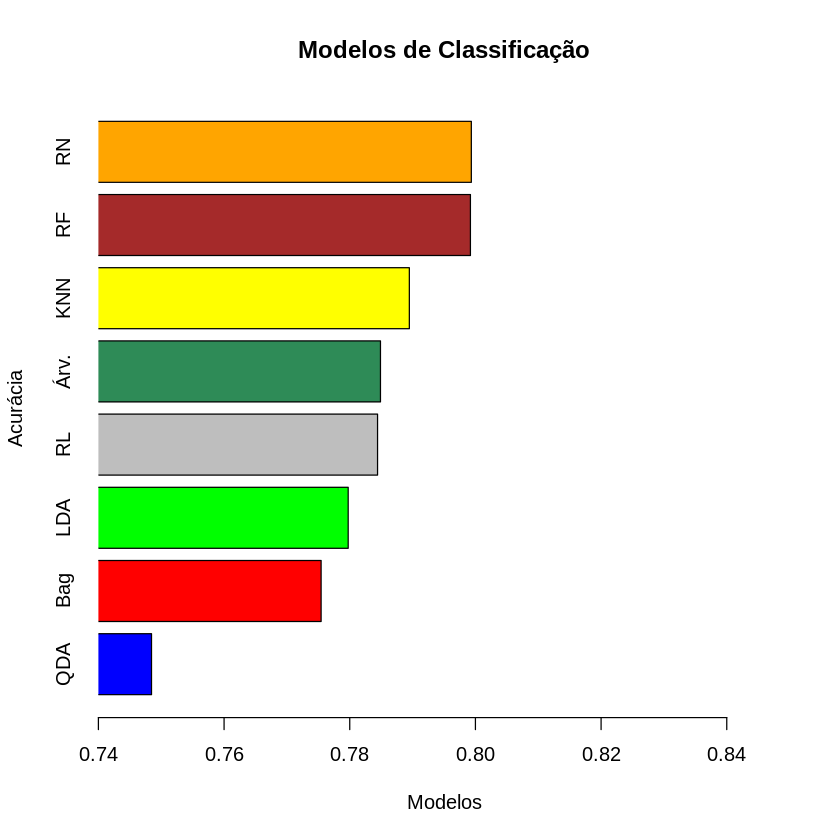

In [ ]:
Acuracia = c(AcuKNN1, AcuAR1, AcuRL1, AcuBg1,  AcuRF1, AcuLDA1, AcuQDA1, AcuNN1)
Modelos = c("KNN", "Árv.","RL", "Bag", "RF", "LDA", "QDA", "RN")


M1 <- data.frame(Acuracia, Modelos)
M1 = M1[order(Acuracia), ] 

barplot(M1$Acuracia,
        names.arg = M1$Modelos,
        horiz = TRUE,
        xlim = c(0.74, .85),
        xpd = FALSE,
        xlab = "Modelos",
        ylab = "Acurácia",
        main = "Modelos de Classificação",
        col = c("blue", "red", "green","gray", "seagreen", "yellow", "brown", "orange"))

**Desta forma observamos que o Modelo de Randon Florest é o que tem melhor ajuste aos dados do dataset estudado.**

In [ ]:
# Elaborando o arquivo de submissão com a predição final
# Melhor acurácia obtida no modelo de Random Forest

predicao = predict(rf1, newdata = teste)
predicao = as.numeric(predicao) - 1
submissao = data.frame(cbind(1:309, predicao))
colnames(submissao) = c('PassengerId','Survived') 
write.csv(submissao, 'submissao1.csv', row.names = FALSE)


# Segundo Grupo de Modelos de predição

## Recomposição de variáveis

In [ ]:
treino$ticket = tickettreino
teste$ticket = ticketteste

## Engenharia de variáveis

In [ ]:
# Evidenciando a série do ticket

serie = function(x){
          aux = strsplit(x, '')[[1]][1]
          return(aux)
}

# Aplicando aos dados de treino
for (i in 1:1000) {
  if (is.na(as.numeric(treino$ticket[i]))) {
        treino$ticket[i] = sapply(treino$ticket[i], serie)
  }else{
    treino$ticket[i] = 'n'   
  }
}


# Aolicando aos dados de teste
for (i in 1:309) {
  if (is.na(as.numeric(teste$ticket[i]))) {
        teste$ticket[i] = sapply(teste$ticket[i], serie)
  }else{
        teste$ticket[i] = 'n'
  }
}

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(e

In [ ]:
# Determinando a sobrevivência por série do Ticket

aggregate(treino$survived ~ treino$ticket, FUN = mean, na.rm = TRUE)
table(treino$ticket)

treino$ticket,treino$survived
<chr>,<dbl>
A,0.0625000
C,0.2830189
F,0.5000000
L,0.3333333
n,0.3920220
P,0.6463415
S,0.3421053
W,0.2666667



  A   C   F   L   n   P   S   W 
 32  53  12   3 727  82  76  15 

Observa-se que os passageiros com ticket da série P teve uma elevada sobreviência, enquanto os das séries A, C e W as menores.

## Dummerizando a variável Ticket

In [ ]:
# Processando os dados de treino
treino$ticketP = ifelse(treino$ticket == 'P', 1, 0)
treino$ticketACW = ifelse(treino$ticket == 'A' | treino$ticket == 'C' | treino$ticket == 'W', 1, 0)

#  Processando os dados de teste
teste$ticketP = ifelse(teste$ticket == 'P', 1, 0)
teste$ticketACW = ifelse(teste$ticket == 'A' | teste$ticket == 'C' | teste$ticket == 'W', 1, 0)

# eliminando dados não processados
treino = treino[, -20]
teste = teste[, -19]

## Teste de acurácias

In [ ]:
# Ajustando o modelo como Regressão Logaritimica

metodo = 'glm' 
rl2 = train(factor(survived) ~ ., data = treino, method = metodo, 
          trControl = controle)
AcuRL2 = rl2$results$Accuracy
rl2$results  

,parameter,Accuracy,Kappa,AccuracySD,KappaSD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,none,0.7882599,0.5489413,0.05618771,0.1217889


In [ ]:
# Ajustando pelo modelo KNN

metodo = 'knn'
knn2 = train(factor(survived) ~ ., data = treino, method = metodo, 
            trControl = controle, tuneLength = 40 )

knn2

k-Nearest Neighbors 

1000 samples
  20 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 950, 951, 950, 950, 949, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7612113  0.4826561
   7  0.7621098  0.4832248
   9  0.7662683  0.4918345
  11  0.7651980  0.4913134
  13  0.7652040  0.4912280
  15  0.7690003  0.4997199
  17  0.7760143  0.5143729
  19  0.7797205  0.5235484
  21  0.7849294  0.5374755
  23  0.7848211  0.5373779
  25  0.7837269  0.5346075
  27  0.7813206  0.5290310
  29  0.7818187  0.5304574
  31  0.7829250  0.5333238
  33  0.7845174  0.5367297
  35  0.7851116  0.5382953
  37  0.7850174  0.5381217
  39  0.7844156  0.5367500
  41  0.7820089  0.5307421
  43  0.7785083  0.5221972
  45  0.7741975  0.5114539
  47  0.7729952  0.5087165
  49  0.7714350  0.5038909
  51  0.7707409  0.4996418
  53  0.7700511  0.4952638
  55  0.7685407  0.4894290
  57  0.768844

In [ ]:
AcuKNN2 = 0
for (i in knn2$results$Accuracy){
  if(i > AcuKNN2) {
    AcuKNN2 <- i
  }
}
AcuKNN2

[1] 0.7851116

In [ ]:
# Ajustando pelo modelo de árvores de decisão

metodo = 'rpart2'

arvore2 = train(factor(survived) ~ ., data = treino, method = metodo,
              trControl = controle, tuneLength = 20 )

arvore2

note: only 7 possible values of the max tree depth from the initial fit.
 Truncating the grid to 7 .



CART 

1000 samples
  20 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 950, 950, 949, 951, 950, ... 
Resampling results across tuning parameters:

  maxdepth  Accuracy   Kappa    
   1        0.7659030  0.5035499
   4        0.7849110  0.5190371
   7        0.7844027  0.5205790
   8        0.7842027  0.5201096
  10        0.7842027  0.5201096
  15        0.7842027  0.5201096
  19        0.7842027  0.5201096

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was maxdepth = 4.

In [ ]:
AcuAR2 = 0
for (i in arvore2$results$Accuracy){
  if(i > AcuAR2) {
    AcuAR2 <- i
  }
}
AcuAR2 

[1] 0.784911

In [ ]:
# Ajustando pelo método baggin

metodo = 'treebag'
baggin2 = train(factor(survived) ~ ., data = treino, method = metodo,
              trControl = controle, tuneLength = 10 )
AcuBg2 = baggin2$results$Accuracy
baggin2

Bagged CART 

1000 samples
  20 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 951, 949, 951, 950, 951, 949, ... 
Resampling results:

  Accuracy   Kappa    
  0.7867347  0.5423416


In [ ]:
# Ajustando para o método de Análise Discriminante Linear

metodo = 'lda'

lda2 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tuneLength = 10)
AcuLDA2 = lda2$results$Accuracy
lda2              

Linear Discriminant Analysis 

1000 samples
  20 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 949, 951, 951, 950, 950, ... 
Resampling results:

  Accuracy   Kappa    
  0.7871194  0.5463737


In [ ]:
# Ajustando para o método de Análise Discriminante Quadrática

metodo = 'qda'

qda2 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tuneLength = 10)
AcuQDA2 = qda2$results$Accuracy
qda2  

Quadratic Discriminant Analysis 

1000 samples
  20 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 951, 949, 949, 949, 950, 950, ... 
Resampling results:

  Accuracy   Kappa    
  0.7402537  0.4532457


In [ ]:
# definindo o modelo de rede neural

metodo = 'nnet'

nnet2 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tune.nnet = 10)


Streaming output truncated to the last 5000 lines.
iter  30 value 422.619216
final  value 422.570624 
converged
# weights:  67
initial  value 855.181564 
iter  10 value 461.111832
iter  20 value 431.760067
iter  30 value 411.539000
iter  40 value 405.799384
iter  50 value 402.749681
iter  60 value 401.276980
iter  70 value 398.990733
iter  80 value 397.828163
iter  90 value 397.501574
iter 100 value 397.453569
final  value 397.453569 
stopped after 100 iterations
# weights:  111
initial  value 643.317786 
iter  10 value 428.951718
iter  20 value 400.654681
iter  30 value 390.321338
iter  40 value 386.178401
iter  50 value 383.393045
iter  60 value 382.221817
iter  70 value 381.735918
iter  80 value 381.528371
iter  90 value 381.408365
iter 100 value 381.232074
final  value 381.232074 
stopped after 100 iterations
# weights:  23
initial  value 641.159170 
iter  10 value 477.725529
iter  20 value 438.012902
iter  30 value 417.115177
iter  40 value 414.439058
iter  50 value 407.604307
ite

In [ ]:
AcuNN2 = 0
for (i in nnet2$results$Accuracy){
  if(i > AcuNN2) {
    AcuNN2 <- i
  }
}
AcuNN2 

[1] 0.8009286

In [ ]:
# definindo o modelo de random forest

metodo = 'rf'

rf2 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tuneLength = 10)

rf2

Random Forest 

1000 samples
  20 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 951, 950, 949, 951, 950, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.7992407  0.5721073
   4    0.8024574  0.5745335
   6    0.8007392  0.5702281
   8    0.7973402  0.5641073
  10    0.7916532  0.5518244
  12    0.7870306  0.5421959
  14    0.7845162  0.5363452
  16    0.7848322  0.5371666
  18    0.7860206  0.5392786
  20    0.7867088  0.5407725

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.

In [ ]:
AcuRF2 = 0
for (i in rf2$results$Accuracy){
  if(i > AcuRF2) {
    AcuRF2 <- i
  }
}
AcuRF2

[1] 0.8024574

## Comparação dos resultados do segundo modelo

**Gráfico comparativo da acurácia das predições realizadas com cada modelo**

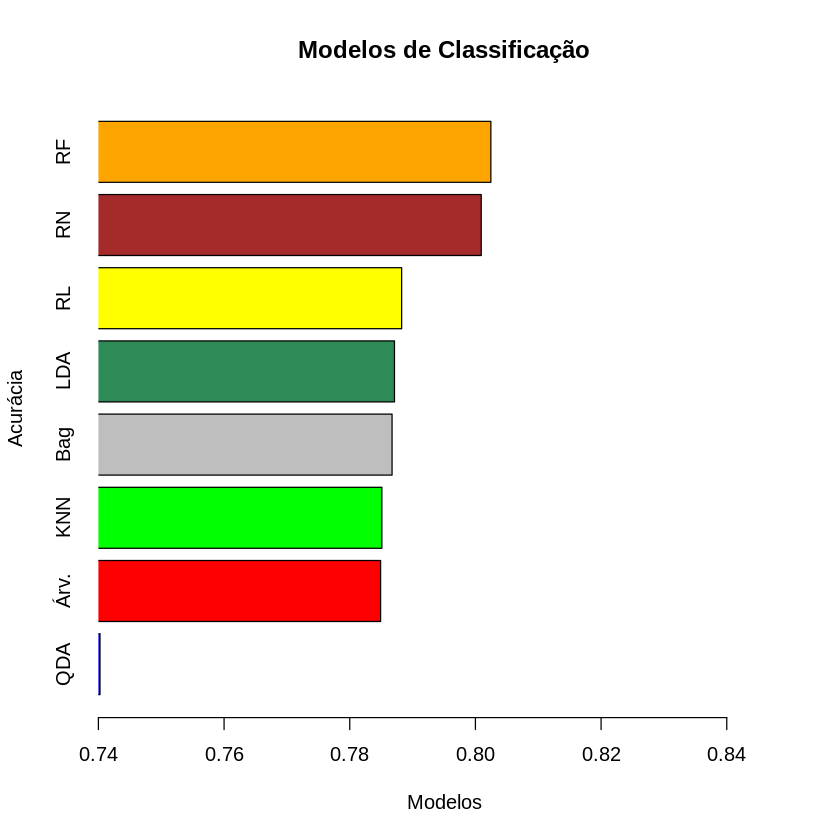

In [ ]:
Acuracia = c(AcuKNN2, AcuAR2, AcuRL2, AcuBg2,  AcuRF2, AcuLDA2, AcuQDA2, AcuNN2)
Modelos = c("KNN", "Árv.","RL", "Bag", "RF", "LDA", "QDA", "RN")


M2 <- data.frame(Acuracia, Modelos)
M2 = M2[order(Acuracia), ] 

barplot(M2$Acuracia,
        names.arg = M2$Modelos,
        horiz = TRUE,
        xpd = FALSE,
        xlim = c(0.74, .85),
        xlab = "Modelos",
        ylab = "Acurácia",
        main = "Modelos de Classificação",
        col = c("blue", "red", "green","gray", "seagreen", "yellow", "brown", "orange"))

**Desta forma observamos que o Modelo de Randon Florest é o que tem melhor ajuste aos dados do dataset estudado.**

# Terceiro Grupo de Modelos de predição

## Recomposição de Variáveis

In [ ]:
# Recompondo as variáveis Idade e Tarifa nos dados de treino
treino$age = guardatreinoage
treino$fare = guardatreinofare

treino = treino[, -c(9, 10, 11, 12, 13, 14, 15, 16)]

# Recompondo as variáveis de Idade e Tarifa nos dados de teste
teste$age = guardatesteage
teste$fare = guardatestefare

teste = teste[, -c(8, 9, 10, 11, 12, 13, 14, 15)]

## Normalizando as variáveis contínuas

In [ ]:
# normalizando a variável idade

treino$age = (treino$age - min(treino$age))/(max(treino$age) - min(treino$age))
teste$age = (teste$age - min(teste$age))/(max(teste$age) - min(teste$age))

In [ ]:
# normalizando a variável tarifa

treino$fare = (treino$fare - min(treino$fare))/(max(treino$fare) - min(treino$fare))
teste$fare = (teste$fare - min(teste$fare))/(max(teste$fare) - min(teste$fare))

## Teste de acurácias

In [ ]:
# Ajustando o modelo como Regressão Logaritimica

metodo = 'glm' 
rl3 = train(factor(survived) ~ ., data = treino, method = metodo, 
          trControl = controle)
AcuRL3 = rl3$results$Accuracy
rl3$results  

,parameter,Accuracy,Kappa,AccuracySD,KappaSD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,none,0.7889481,0.5548749,0.05526005,0.116375


In [ ]:
# Ajustando pelo modelo KNN

metodo = 'knn'
knn3 = train(factor(survived) ~ ., data = treino, method = metodo, 
            trControl = controle, tuneLength = 40 )

knn3

k-Nearest Neighbors 

1000 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 951, 951, 951, 949, 949, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7886504  0.5529889
   7  0.7937205  0.5607927
   9  0.7786790  0.5269640
  11  0.7905993  0.5497532
  13  0.7837906  0.5359273
  15  0.7841928  0.5365803
  17  0.7923035  0.5525991
  19  0.7929679  0.5541402
  21  0.7944863  0.5572147
  23  0.7963906  0.5604538
  25  0.7975646  0.5633859
  27  0.7973667  0.5641627
  29  0.7947657  0.5583790
  31  0.7961561  0.5609241
  33  0.7974543  0.5642493
  35  0.8009492  0.5729089
  37  0.8011672  0.5730583
  39  0.8015794  0.5741624
  41  0.8026719  0.5764270
  43  0.8025699  0.5759753
  45  0.8044601  0.5800355
  47  0.8042762  0.5796114
  49  0.8016736  0.5736052
  51  0.7999571  0.5696606
  53  0.8006532  0.5717201
  55  0.7997651  0.5699329
  57  0.799061

In [ ]:
AcuKNN3 = 0
for (i in knn3$results$Accuracy){
  if(i > AcuKNN3) {
    AcuKNN3 <- i
  }
}
AcuKNN3

[1] 0.8044601

In [ ]:
# Ajustando pelo modelo de árvores de decisão

metodo = 'rpart2'

arvore3 = train(factor(survived) ~ ., data = treino, method = metodo,
              trControl = controle, tuneLength = 20 )

arvore3

note: only 8 possible values of the max tree depth from the initial fit.
 Truncating the grid to 8 .



CART 

1000 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 950, 950, 951, 949, 950, ... 
Resampling results across tuning parameters:

  maxdepth  Accuracy   Kappa    
   1        0.7620268  0.4961900
   4        0.7858319  0.5383169
   6        0.7918294  0.5467052
   9        0.7959261  0.5563984
  11        0.7953301  0.5549686
  13        0.7953301  0.5549686
  24        0.7953301  0.5549686
  30        0.7953301  0.5549686

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was maxdepth = 9.

In [ ]:
AcuAR3 = 0
for (i in arvore3$results$Accuracy){
  if(i > AcuAR3) {
    AcuAR3 <- i
  }
}
AcuAR3 

[1] 0.7959261

In [ ]:
# Ajustando pelo método baggin

metodo = 'treebag'
baggin3 = train(factor(survived) ~ ., data = treino, method = metodo,
              trControl = controle, tuneLength = 10 )
AcuBg3 = baggin3$results$Accuracy
baggin3

Bagged CART 

1000 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 949, 949, 950, 950, 949, 949, ... 
Resampling results:

  Accuracy   Kappa    
  0.7805671  0.5345089


In [ ]:
# Ajustando para o método de Análise Discriminante Linear

metodo = 'lda'

lda3 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tuneLength = 10)
AcuLDA3 = lda3$results$Accuracy
lda3             

Linear Discriminant Analysis 

1000 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 951, 949, 950, 950, 950, 950, ... 
Resampling results:

  Accuracy  Kappa    
  0.786916  0.5503415


In [ ]:
# Ajustando para o método de Análise Discriminante Quadrática

metodo = 'qda'

qda3 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tuneLength = 10)
AcuQDA3 = qda3$results$Accuracy
qda3 

Quadratic Discriminant Analysis 

1000 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 950, 951, 949, 950, 950, ... 
Resampling results:

  Accuracy   Kappa    
  0.7629683  0.4928974


In [ ]:
# definindo o modelo de rede neural

metodo = 'nnet'

nnet3 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tune.nnet = 10)


Streaming output truncated to the last 5000 lines.
iter  60 value 372.316430
iter  70 value 371.422502
iter  80 value 370.364904
iter  90 value 369.820191
iter 100 value 368.280479
final  value 368.280479 
stopped after 100 iterations
# weights:  81
initial  value 692.665853 
iter  10 value 422.157748
iter  20 value 390.592896
iter  30 value 375.734253
iter  40 value 364.148527
iter  50 value 352.104320
iter  60 value 344.628941
iter  70 value 341.551316
iter  80 value 340.655306
iter  90 value 340.204648
iter 100 value 339.160537
final  value 339.160537 
stopped after 100 iterations
# weights:  17
initial  value 802.034149 
iter  10 value 445.051588
iter  20 value 425.233366
iter  30 value 419.551175
iter  40 value 419.446274
final  value 419.446008 
converged
# weights:  49
initial  value 746.887660 
iter  10 value 427.944498
iter  20 value 413.506757
iter  30 value 410.671116
iter  40 value 409.920932
iter  50 value 408.379709
iter  60 value 401.673809
iter  70 value 400.635578
iter

In [ ]:
AcuNN3 = 0
for (i in nnet3$results$Accuracy){
  if(i > AcuNN3) {
    AcuNN3 <- i
  }
}
AcuNN3 

[1] 0.8060924

In [ ]:
# definindo o modelo de random forest

metodo = 'rf'

rf3 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tuneLength = 10)

rf3

Random Forest 

1000 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 949, 950, 950, 950, 949, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8009652  0.5746926
   3    0.8101571  0.5898667
   4    0.8121471  0.5927962
   6    0.8065802  0.5826521
   7    0.8052535  0.5811118
   8    0.8040393  0.5792067
  10    0.7972671  0.5669918
  11    0.7958749  0.5645877
  12    0.7939607  0.5612316
  14    0.7915600  0.5559117

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.

In [ ]:
AcuRF3 = 0
for (i in rf3$results$Accuracy){
  if(i > AcuRF3) {
    AcuRF3 <- i
  }
}
AcuRF3

[1] 0.8121471

## Comparação dos resultados do terceiro modelo

**Gráfico comparativo da acurácia das predições realizadas com cada modelo**

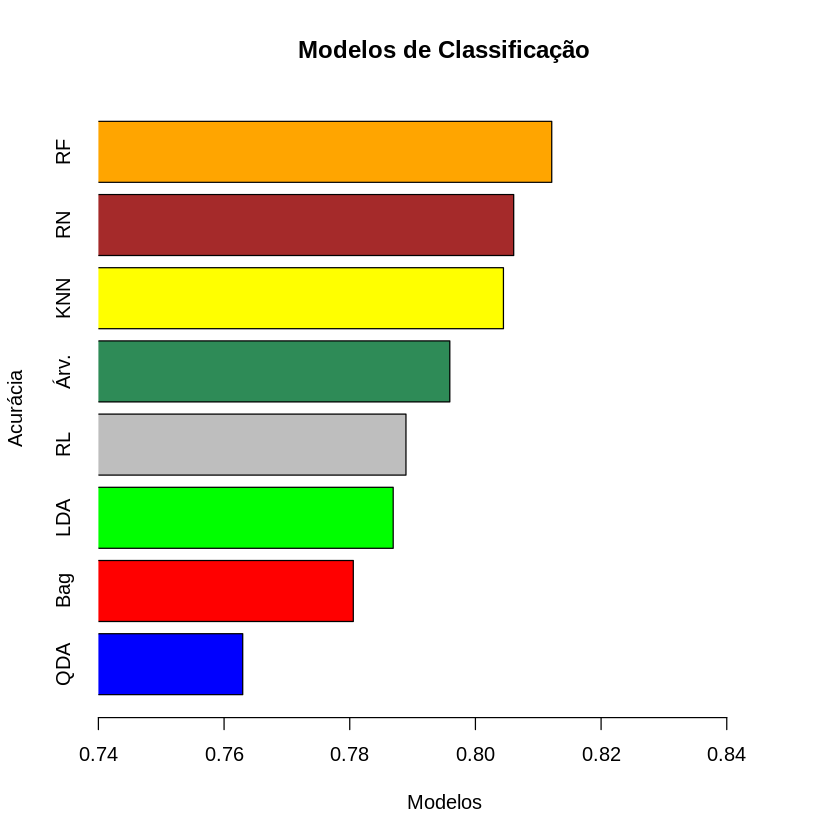

In [ ]:
Acuracia = c(AcuKNN3, AcuAR3, AcuRL3, AcuBg3,  AcuRF3, AcuLDA3, AcuQDA3, AcuNN3)
Modelos = c("KNN", "Árv.","RL", "Bag", "RF", "LDA", "QDA", "RN")


M3 <- data.frame(Acuracia, Modelos)
M3 = M3[order(Acuracia), ] 

barplot(M3$Acuracia,
        names.arg = M3$Modelos,
        horiz = TRUE,
        xpd = FALSE,
        xlim = c(0.74, .85),
        xlab = "Modelos",
        ylab = "Acurácia",
        main = "Modelos de Classificação",
        col = c("blue", "red", "green","gray", "seagreen", "yellow", "brown", "orange"))

**Desta forma observamos que o Modelo de Randon Florest é o que tem melhor ajuste aos dados do dataset estudado.**

# Quarto Grupo de Modelos de Predição

## Recomposição de Variáveis

In [ ]:
head(treino)


,sex,survived,EmbS,EmbC,Class1,Class2,Tit,Tit2,sozinho,casal,filhos,ticketP,ticketACW,age,fare
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,1,0,1,0,0,0,1,0,0,0,0,0.408551350,0.41250333
2,1,1,1,0,1,0,0,0,0,1,1,0,0,0.008314485,0.29580590
3,1,0,1,0,1,0,1,0,0,1,1,0,0,0.422803125,0.29580590
4,1,1,1,0,1,0,1,0,1,0,0,0,0,0.679335069,0.05182215
5,0,1,1,0,1,0,0,0,0,1,0,0,0,0.893111690,0.15216447
6,0,1,1,0,1,0,0,1,0,1,0,0,0,0.750593943,0.10048071


## Teste de acurácias

In [ ]:
# Ajustando o modelo como Regressão Logaritimica

metodo = 'glm' 
rl4 = train(factor(survived) ~ ., data = treino, method = metodo, 
          trControl = controle)
AcuRL4 = rl4$results$Accuracy
rl4$results  

,parameter,Accuracy,Kappa,AccuracySD,KappaSD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,none,0.78775,0.5519797,0.05398783,0.114379


In [ ]:
# Ajustando pelo modelo KNN

metodo = 'knn'
knn4 = train(factor(survived) ~ ., data = treino, method = metodo, 
            trControl = controle, tuneLength = 40 )

knn4

k-Nearest Neighbors 

1000 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 949, 951, 950, 949, 949, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7902561  0.5553075
   7  0.7948906  0.5632041
   9  0.7774337  0.5243998
  11  0.7907814  0.5501184
  13  0.7849685  0.5380303
  15  0.7855886  0.5388449
  17  0.7934180  0.5547621
  19  0.7941066  0.5563375
  21  0.7924302  0.5528202
  23  0.7957228  0.5583441
  25  0.7995250  0.5671887
  27  0.7979509  0.5646447
  29  0.7943243  0.5569385
  31  0.7966365  0.5616794
  33  0.7992449  0.5681721
  35  0.8011296  0.5728082
  37  0.8010217  0.5723037
  39  0.8014276  0.5732048
  41  0.8022198  0.5750207
  43  0.8025202  0.5755388
  45  0.8026363  0.5760258
  47  0.8020299  0.5742024
  49  0.8011338  0.5721155
  51  0.7987391  0.5669047
  53  0.7992252  0.5683154
  55  0.7986351  0.5673069
  57  0.798233

In [ ]:
AcuKNN4 = 0
for (i in knn4$results$Accuracy){
  if(i > AcuKNN4) {
    AcuKNN4 <- i
  }
}
AcuKNN4

[1] 0.8026363

In [ ]:
# Ajustando pelo modelo de árvores de decisão

metodo = 'rpart2'

arvore4 = train(factor(survived) ~ ., data = treino, method = metodo,
              trControl = controle, tuneLength = 20 )

arvore4

note: only 8 possible values of the max tree depth from the initial fit.
 Truncating the grid to 8 .



CART 

1000 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 949, 950, 950, 950, 950, ... 
Resampling results across tuning parameters:

  maxdepth  Accuracy   Kappa    
   1        0.7651375  0.5015105
   4        0.7854214  0.5362049
   6        0.7936326  0.5504572
   9        0.8001463  0.5649576
  11        0.7998402  0.5640471
  13        0.7998402  0.5640471
  24        0.7998402  0.5640471
  30        0.7998402  0.5640471

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was maxdepth = 9.

In [ ]:
AcuAR4 = 0
for (i in arvore4$results$Accuracy){
  if(i > AcuAR4) {
    AcuAR4 <- i
  }
}
AcuAR4 

[1] 0.8001463

In [ ]:
# Ajustando pelo método baggin

metodo = 'treebag'
baggin4 = train(factor(survived) ~ ., data = treino, method = metodo,
              trControl = controle, tuneLength = 10 )
AcuBg4 = baggin4$results$Accuracy
baggin4

Bagged CART 

1000 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 949, 950, 949, 950, 949, ... 
Resampling results:

  Accuracy   Kappa    
  0.7796818  0.5324275


In [ ]:
# Ajustando para o método de Análise Discriminante Linear

metodo = 'lda'

lda4 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tuneLength = 10)
AcuLDA4 = lda4$results$Accuracy
lda4              

Linear Discriminant Analysis 

1000 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 950, 950, 950, 949, 950, 951, ... 
Resampling results:

  Accuracy   Kappa    
  0.7866567  0.5499963


In [ ]:
# Ajustando para o método de Análise Discriminante Quadrática

metodo = 'qda'

qda4 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tuneLength = 10)
AcuQDA4 = qda4$results$Accuracy
qda4  

Quadratic Discriminant Analysis 

1000 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 949, 949, 950, 950, 950, 951, ... 
Resampling results:

  Accuracy   Kappa    
  0.7633682  0.4932866


In [ ]:
# definindo o modelo de rede neural

metodo = 'nnet'

nnet4 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tune.nnet = 10)


Streaming output truncated to the last 5000 lines.
iter  30 value 412.742894
iter  40 value 412.045496
iter  50 value 412.037917
iter  60 value 412.037233
iter  60 value 412.037231
iter  60 value 412.037231
final  value 412.037231 
converged
# weights:  49
initial  value 652.694021 
iter  10 value 445.902046
iter  20 value 393.511240
iter  30 value 383.741805
iter  40 value 377.292423
iter  50 value 375.905270
iter  60 value 375.193698
iter  70 value 374.527314
iter  80 value 373.352803
iter  90 value 372.255973
iter 100 value 371.738306
final  value 371.738306 
stopped after 100 iterations
# weights:  81
initial  value 629.169075 
iter  10 value 419.639592
iter  20 value 397.503561
iter  30 value 375.405995
iter  40 value 359.706370
iter  50 value 352.141067
iter  60 value 347.508551
iter  70 value 345.195857
iter  80 value 340.649728
iter  90 value 336.801291
iter 100 value 333.057475
final  value 333.057475 
stopped after 100 iterations
# weights:  17
initial  value 706.907444 
iter

In [ ]:
AcuNN4 = 0
for (i in nnet4$results$Accuracy){
  if(i > AcuNN4) {
    AcuNN4 <- i
  }
}
AcuNN4 

[1] 0.8070406

In [ ]:
# definindo o modelo de random forest

metodo = 'rf'

rf4 = train(factor(survived) ~., data = treino, method = metodo,
              trControl = controle, tuneLength = 10)

rf4

Random Forest 

1000 samples
  14 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 10 times) 
Summary of sample sizes: 951, 950, 950, 950, 949, 949, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8010581  0.5752370
   3    0.8069727  0.5829103
   4    0.8111791  0.5905999
   6    0.8059981  0.5815451
   7    0.8051880  0.5813503
   8    0.8027819  0.5772723
  10    0.7954505  0.5636718
  11    0.7955767  0.5642542
  12    0.7931505  0.5594223
  14    0.7898477  0.5525190

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.

In [ ]:
AcuRF4 = 0
for (i in rf4$results$Accuracy){
  if(i > AcuRF4) {
    AcuRF4 <- i
  }
}
AcuRF4

[1] 0.8111791

## Comparação dos resultados do quarto modelo

**Gráfico comparativo da acurácia das predições realizadas com cada modelo**

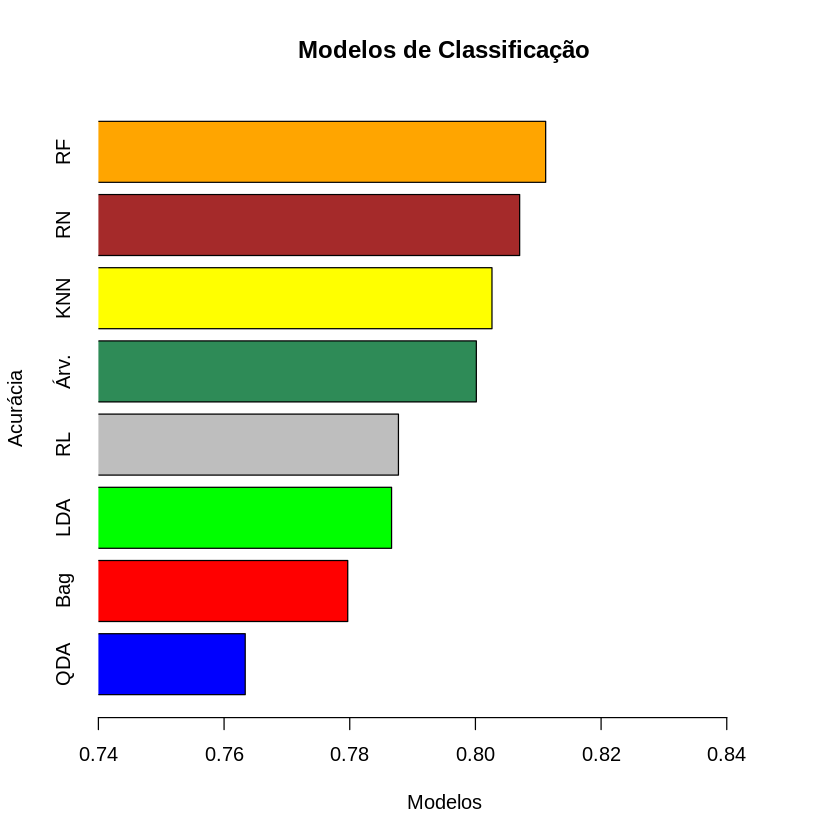

In [ ]:
Acuracia = c(AcuKNN4, AcuAR4, AcuRL4, AcuBg4,  AcuRF4, AcuLDA4, AcuQDA4, AcuNN4)
Modelos = c("KNN", "Árv.","RL", "Bag", "RF", "LDA", "QDA", "RN")


M4 <- data.frame(Acuracia, Modelos)
M4 = M4[order(Acuracia), ] 

barplot(M4$Acuracia,
        names.arg = M4$Modelos,
        horiz = TRUE,
        xpd = FALSE,
        xlim = c(0.74, .85),
        xlab = "Modelos",
        ylab = "Acurácia",
        main = "Modelos de Classificação",
        col = c("blue", "red", "green","gray", "seagreen", "yellow", "brown", "orange"))

**Desta forma observamos que o Modelo de Randon Florest é o que tem melhor ajuste aos dados do dataset estudado.**

# Definindo os arquivos de submissão

## Comparando os Quatro Grupos

In [ ]:
M1

,Acuracia,Modelos
,<dbl>,<chr>
7,0.7484524,QDA
4,0.7754446,Bag
6,0.7797535,LDA
3,0.7844255,RL
2,0.7848898,Árv.
1,0.7894848,KNN
5,0.7992052,RF
8,0.7993497,RN


In [ ]:
M2

,Acuracia,Modelos
,<dbl>,<chr>
7,0.7402537,QDA
2,0.7849110,Árv.
1,0.7851116,KNN
4,0.7867347,Bag
6,0.7871194,LDA
3,0.7882599,RL
8,0.8009286,RN
5,0.8024574,RF


In [ ]:
M3

,Acuracia,Modelos
,<dbl>,<chr>
7,0.7629683,QDA
4,0.7805671,Bag
6,0.7869160,LDA
3,0.7889481,RL
2,0.7959261,Árv.
1,0.8044601,KNN
8,0.8060924,RN
5,0.8121471,RF


In [ ]:
M4

,Acuracia,Modelos
,<dbl>,<chr>
7,0.7633682,QDA
4,0.7796818,Bag
6,0.7866567,LDA
3,0.7877500,RL
2,0.8001463,Árv.
1,0.8026363,KNN
8,0.8070406,RN
5,0.8111791,RF


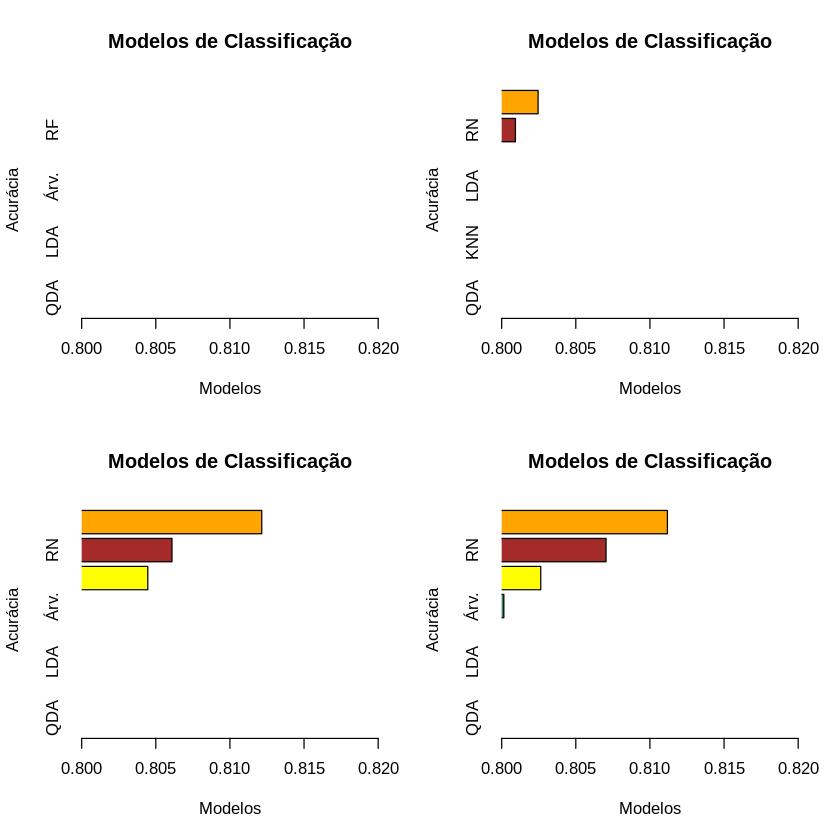

In [ ]:
par(mfrow = c(2, 2))

barplot(M1$Acuracia,
        names.arg = M1$Modelos,
        horiz = TRUE,
        xpd = FALSE,
        xlim = c(0.8, .82),
        xlab = "Modelos",
        ylab = "Acurácia",
        main = "Modelos de Classificação",
        col = c("blue", "red", "green","gray", "seagreen", "yellow", "brown", "orange"))
barplot(M2$Acuracia,
        names.arg = M2$Modelos,
        horiz = TRUE,
        xpd = FALSE,
        xlim = c(0.8, .82),
        xlab = "Modelos",
        ylab = "Acurácia",
        main = "Modelos de Classificação",
        col = c("blue", "red", "green","gray", "seagreen", "yellow", "brown", "orange"))
barplot(M3$Acuracia,
        names.arg = M3$Modelos,
        horiz = TRUE,
        xpd = FALSE,
        xlim = c(0.8, .82),
        xlab = "Modelos",
        ylab = "Acurácia",
        main = "Modelos de Classificação",
        col = c("blue", "red", "green","gray", "seagreen", "yellow", "brown", "orange"))
barplot(M4$Acuracia,
        names.arg = M4$Modelos,
        horiz = TRUE,
        xpd = FALSE,
        xlim = c(0.8, .82),
        xlab = "Modelos",
        ylab = "Acurácia",
        main = "Modelos de Classificação",
        col = c("blue", "red", "green","gray", "seagreen", "yellow", "brown", "orange"))


## Criando os arquivos de Submissão

Análisando o conjunto de resultados obtidos com os quatro processamentos de dados e osmodelamentos realizados, estabelço os seguintes dados de submissão:

1.   Melhor desempenho: Random Forest do Grupo 3
2.   Segundo melhor desempenho: Random Forest do Grupo 4
3.   Alto desempenho e Modelo distinto: Rede Neural do Grupo 4




In [ ]:
# Random Forest do Grupo 3

predicao = predict(rf3, newdata = teste)
predicao = as.numeric(predicao) - 1
submissao = data.frame(cbind(1:309, predicao))
colnames(submissao) = c('PassengerId','Survived') 
write.csv(submissao, 'submissao1.csv', row.names = FALSE)

In [ ]:
# Random Forest do Grupo 4

predicao = predict(rf4, newdata = teste)
predicao = as.numeric(predicao) - 1
submissao = data.frame(cbind(1:309, predicao))
colnames(submissao) = c('PassengerId','Survived') 
write.csv(submissao, 'submissao2.csv', row.names = FALSE)

In [ ]:
# Rede Neural do Grupo 4

predicao = predict(nnet4, newdata = teste)
predicao = as.numeric(predicao) - 1
submissao = data.frame(cbind(1:309, predicao))
colnames(submissao) = c('PassengerId','Survived') 
write.csv(submissao, 'submissao3.csv', row.names = FALSE)